In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor,
                              AdaBoostRegressor ,
                                GradientBoostingRegressor,
                                VotingRegressor,
                                StackingRegressor)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error , r2_score
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split

import pickle
import os

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("C:\\Users\\91923\\Downloads\\laptop_data_cleaned.csv")
df.drop_duplicates(inplace=True)

In [18]:
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


In [19]:
dfnew = pd.read_csv("C:\\Users\\91923\\Downloads\\laptop_data_cleaned.csv")
dfnew

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


In [20]:
cat_cols = [features for features in df.columns if df[features].dtypes == 'O']
num_cols = [features for features in df.columns if df[features].dtypes != 'O']
print(f'cat_cols {len(cat_cols)}')
print(f'num_cols {len(num_cols)}')

cat_cols 5
num_cols 8


In [21]:
df[cat_cols]
df[cat_cols].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1272 entries, 0 to 1272
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Company    1272 non-null   object
 1   TypeName   1272 non-null   object
 2   Cpu_brand  1272 non-null   object
 3   Gpu_brand  1272 non-null   object
 4   Os         1272 non-null   object
dtypes: object(5)
memory usage: 59.6+ KB


In [22]:
df['Weight'] = df['Weight'].astype(float)
df['Ram'] = df['Ram'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1272 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1272 non-null   object 
 1   TypeName     1272 non-null   object 
 2   Ram          1272 non-null   int64  
 3   Weight       1272 non-null   float64
 4   Price        1272 non-null   float64
 5   TouchScreen  1272 non-null   int64  
 6   Ips          1272 non-null   int64  
 7   Ppi          1272 non-null   float64
 8   Cpu_brand    1272 non-null   object 
 9   HDD          1272 non-null   int64  
 10  SSD          1272 non-null   int64  
 11  Gpu_brand    1272 non-null   object 
 12  Os           1272 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 139.1+ KB


ValueError: Could not interpret value `OpSys` for parameter `hue`

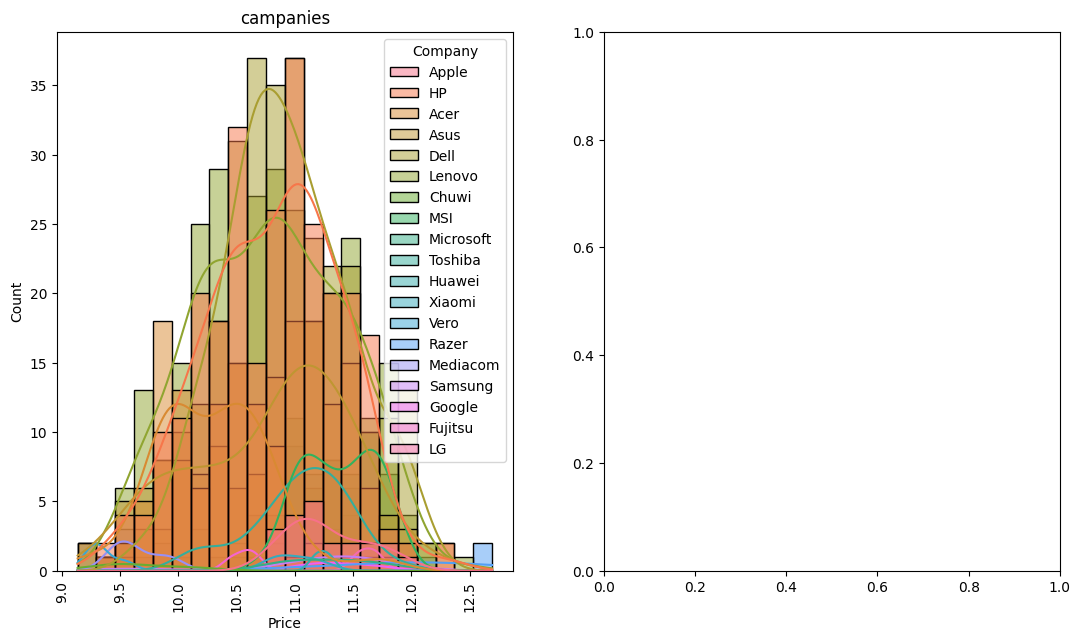

In [23]:
plt.subplots(nrows=1,ncols=2,figsize = (20,7))

plt.subplot(1,3,1)
ax = sns.histplot(data=df,x=df['Price'],color='g',hue='Company',kde=True)
plt.title('campanies')
plt.xticks(rotation = 'vertical')

plt.subplot(1,3,2)
ax = sns.histplot(data=df,x=df['Price'],kde=True,color='y',hue='OpSys')
plt.xticks(rotation = 'vertical')
plt.title(label='Operating System')

plt.subplot(1,3,3)
sns.histplot(data=df,x=df['Price'],kde=True,hue=df['TypeName'])
plt.title('TypeName',)
plt.xticks(rotation = 'vertical')

print(f'{df["Company"].value_counts().head(1)}') 
print('')
print(f'{df["OpSys"].value_counts().head(1)}') 
print('')
print(f'{df["TypeName"].value_counts().head(1)}') 
print('')


In [24]:
X = df.drop(columns=['Price'])
y = df['Price']
cat_cols = [features for features in X.columns if X[features].dtypes == 'O']
num_cols = [features for features in X.columns if X[features].dtypes != 'O']
len(num_cols) , len(cat_cols)

(7, 5)

In [25]:
cat_pipeline = Pipeline(
    steps=[
        ('ohe',OneHotEncoder(sparse=False,
        drop='first'
              )),
        ('imputer',SimpleImputer())
    ]
)
num_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer()),
        ('scaler',StandardScaler()),
    ]
)
preprocessor_obj = ColumnTransformer(
    transformers=[
        ('cat_col_pipeline',cat_pipeline,cat_cols),
        ('num_col_pipeline',num_pipeline,num_cols)
    ],remainder='passthrough'
)
X = preprocessor_obj.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=1)

X_train.shape , X_test.shape , y_train.shape ,y_test.shape

((1017, 38), (255, 38), (1017,), (255,))

In [27]:
X_train.shape

(1017, 38)

In [28]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [29]:
y_pred = dt.predict(X_test)
r2_score(y_test,y_pred)

0.8107094645399501

In [30]:
models = {
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
}
params = {
    "Random Forest": {
        'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        
        'n_estimators': [8, 16, 32, 64, 128, 256]
    },
    "Gradient Boosting": {
        'loss': ['squared_error', 'huber', 'absolute_error', 'quantile'],
        'learning_rate': [0.1, 0.01, 0.05, 0.001],
        'criterion': ['squared_error', 'friedman_mse'],
        'n_estimators': [8, 16, 32, 64, 128, 256]
    },
    "XGBRegressor": {
        'learning_rate': [0.1, 0.01, 0.05, 0.001],
        'n_estimators': [8, 16, 32, 64, 128, 256]
    },
    "CatBoosting Regressor": {
        'depth': [6, 8, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'iterations': [30, 50, 100]
    },
    "AdaBoost Regressor": {
        'learning_rate': [0.1, 0.01, 0.5, 0.001],
        'n_estimators': [8, 16, 32, 64, 128, 256]
    }
}
len(params.keys())

5

In [31]:
def error_Accuracy(true,pred):
    r2_accuracy = r2_score(y_true=true,y_pred=pred)
    mse = mean_squared_error(y_true=true,y_pred=pred)
    mae = mean_absolute_error(y_true=true,y_pred=pred)
    return r2_accuracy,mse,mae
class ModelTraining:
    def __init__(self):
        self.model_list = []
        self.accuracy_list = []
        self.best_params_dict = {}

    def train_model(self, models, params, X_train, y_train, X_test, y_test):
        for i, model_name in enumerate(models.keys()):
            model = models[model_name]
            param = params[model_name]

            grid_search_cv = GridSearchCV(estimator=model, param_grid=param, cv=5)
            grid_search_cv.fit(X_train, y_train)

            best_params = grid_search_cv.best_params_
            model.set_params(**best_params)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            r2_accuracy, mse, mae = error_Accuracy(true=y_test, pred=y_pred)

            print(model_name)
            self.model_list.append(model_name)

            print("- Mean Absolute Error: {:.4f}".format(mae))
            print("- Mean Squared Error: {:.4f}".format(mse))
            print("- R2 Score: {:.4f}".format(r2_accuracy))
            print('\n')

            self.best_params_dict[model_name] = best_params

            self.accuracy_list.append(r2_accuracy)

    def return_accuracy_list(self):
        return self.accuracy_list
    
    def best_params(self):
        return self.best_params_dict
train_model = ModelTraining()


In [33]:
train_model.train_model(models=models,params=params,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)

Random Forest
- Mean Absolute Error: 0.1517
- Mean Squared Error: 0.0395
- R2 Score: 0.8909


Gradient Boosting
- Mean Absolute Error: 0.1580
- Mean Squared Error: 0.0402
- R2 Score: 0.8888


XGBRegressor
- Mean Absolute Error: 0.1396
- Mean Squared Error: 0.0346
- R2 Score: 0.9044


CatBoosting Regressor
- Mean Absolute Error: 0.1583
- Mean Squared Error: 0.0427
- R2 Score: 0.8818


AdaBoost Regressor
- Mean Absolute Error: 0.2147
- Mean Squared Error: 0.0709
- R2 Score: 0.8039


